<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Timestamp                                               1253 non-null   object 
 1   Age                                                     1226 non-null   float64
 2   Gender                                                  1243 non-null   object 
 3   City                                                    1253 non-null   object 
 4   Position                                                1247 non-null   object 
 5   Total years of experience                               1237 non-null   object 
 6   Years of experience in Germany                          1221 non-null   object 
 7   Seniority level                                         1241 non-null   object 
 8   Your main technology / programming lan

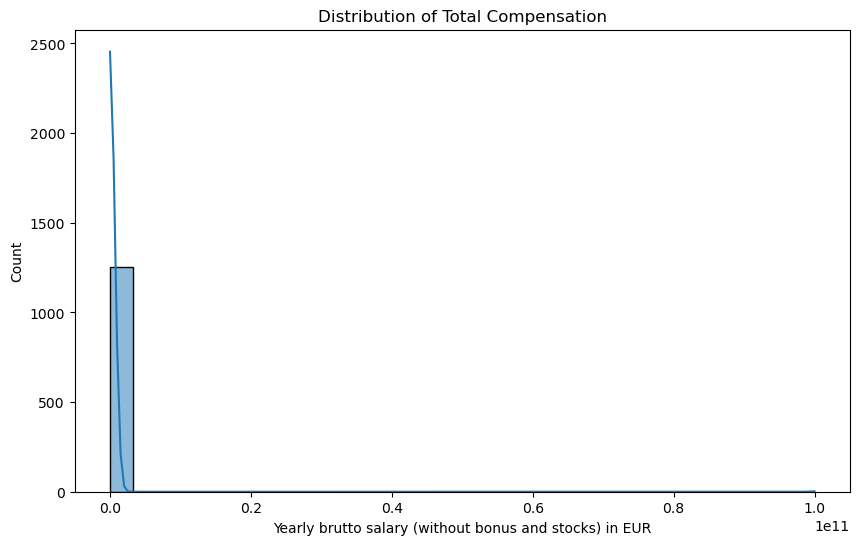

In [1031]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv("data/Euro_Salary.csv")  # Replace 'your_data_file.csv' with the actual file name

# Display basic information about the dataset
print(df.info())

# Display summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['Yearly brutto salary (without bonus and stocks) in EUR'], bins=30, kde=True)
plt.title('Distribution of Total Compensation')
plt.show()

# Assignment 2 - Regression
### Predict the TOTAL COMPENSATION for this year. 

The data file provided is a salary survey for tech workers in Europe. We want to predict the total amount of compensation they bring in each year, based off of the details of their work. 

Some notes that will be important:
<ul>
    <li>The total compensation will need to be constructed, there is a column for salary, "Yearly brutto salary (without bonus and stocks) in EUR", as well as a column for bonus compensation, "Yearly bonus + stocks in EUR". 
    <li>Some categorical variables will need some work, and there isn't generally an exact answer. The main concern is things with categories that have a bunch of values with a very small count. For example, if there is only 1 person in City X, then that value likely needs to be addressed. We don't want it encoded into a new column of one 1 and thousands of 0s. 
    <li>There is an article exploring some of the data here: https://www.asdcode.de/2021/01/it-salary-survey-december-2020.html
    <li>Imputation and a bit of data manipulation will be required. 
    <li>Use any regression method you'd like. Some ones are closely related to what we've done, you may want to look at them, e.g. ExtraTreesRegressor. 
    <li>Initial accurracy, and potentially final accuracy, may not be great. When I made a plain model will little optimization the errors were large and the R2 was low. There is lots of room for optimization. 
    <li>Research challenge - try some work on the target, look into TransformedTargetRegressor and see if that helps. Recall in stats when we had skewed distributions... Maybe it helps, maybe it doesn't. 
    <li>EDA and data prep are up to you - you'll probably need to do a little exploring to figure out what cleanup is needed. When I did it, I did things kind of iteratively when I did it. For example, look at the value counts, figure out how to treat the different categories, clean something up, look at the results, potentially repeat if needed. After you figure out what needs to be done, you may be able to take some of those steps and incorporate them into a pipeline to be cleaner....
    <li><b>CRITICAL - Please make sure your code runs with RUN ALL. It should load the data that you're given, do all the processing, and spit out results. Comment out or remove anything that you've cleaned up and don't need - e.g. if you scaled a value manually, then moved that into a pipeline, don't leave the original scaling code active when the file is run.</b>
</ul>

### Details and Deliverables

You'll need to build code to produce the predictions. In particular, there's a few things that'll be marked:
<ul>
    <li>Please add a markdown cell at the bottom, and put in a few notes addressing the following:
    <ul>
        <li> Accuracy of your models with/without feature selection. Include both train/test for each. Please use R2 and RMSE. 
        <li> Feature Selection - Please identify what you did for feature selection. No need for a long explaination, something along the lines of "I did X, and the result was that 4 features were removed". Try at least 2 things. 
        <li> Hyperparameter Changes / Grid Search Improvements. What did you try, and why. Similar explaination to above, short. 
        <li> Overall this section should be roughly as long as this intro block - just outline what the results were, what you did to improve, and the results after. 
        <li> If you could use titles/bullet points I'd really appreciate it. 
    </ul>
    <li>Grade Breakdown:
    <ul>
        <li> Code is readable, there are comments: 20%
        <li> Explaination as defined above: 60% (20% each point)
        <li> Accuracy: 20% As compared to everyone else. This will be generously graded, I won't be surprised if overall accuracy is low for most people. 
    </ul>
</ul>

In [1032]:
#Load Data
df = pd.read_csv("data/Euro_Salary.csv")
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Timestamp,1253,1248,24/11/2020 13:55:19,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,1226.0,NaN,NaN,NaN,32.509788,5.663804,20.0,29.0,32.0,35.0,69.0
Gender,1243,3,Male,1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,1253,119,Berlin,681,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Position,1247,148,Software Engineer,387,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total years of experience,1237,48,10,138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Years of experience in Germany,1221,53,2,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Seniority level,1241,24,Senior,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Your main technology / programming language,1126,256,Java,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Other technologies/programming languages you use often,1096,562,Javascript / Typescript,44,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1033]:
df[393:396]

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
393,24/11/2020 19:15:02,30.0,Male,Moscow,Software Engineer,5,0,Middle,C,C/C++,14712.0,0,30,Full-time employee,Unlimited contract,Russian,101-1000,Product
394,24/11/2020 19:15:49,33.0,Male,Berlin,Product Manager,5,5,Senior,NaN,Python,70000.0,800,30,Full-time employee,NaN,German,101-1000,Product
395,24/11/2020 19:19:30,35.0,Male,Berlin,QA Engineer,11,10,Senior,Java,"Python, Javascript / Typescript, .NET, Java / ...",74400.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [1034]:
#df.info()
df["Other technologies/programming languages you use often"].value_counts()

Javascript / Typescript                                                                   44
Python                                                                                    37
SQL                                                                                       31
AWS, Docker                                                                               16
Kotlin                                                                                    15
                                                                                          ..
Python, Ruby, Java / Scala, Go, Rust, AWS, Kubernetes, Docker, Terraform, helm, packer     1
Kotlin, SQL, AWS, Kubernetes, Docker                                                       1
Python, R, Go                                                                              1
C/C++, PHP, SQL                                                                            1
Python, AWS, Kubernetes, Docker, terraform, ansible                   

In [1035]:
df.sample(20)

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,Yearly brutto salary (without bonus and stocks) in EUR,Yearly bonus + stocks in EUR,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type
372,24/11/2020 18:40:13,32.0,Male,Berlin,Software Engineer,12,1,Senior,Java,"Python, SQL, AWS, Kubernetes, Docker",83000.0,500,27,Full-time employee,Unlimited contract,English,1000+,Product
268,24/11/2020 14:40:25,32.0,Female,Stuttgart,Stuttgart,2,2,Junior,Java,NaN,52000.0,4000,30,Full-time employee,Unlimited contract,English,1000+,Product
47,24/11/2020 11:31:45,32.0,Male,Berlin,Backend Developer,3,1,Middle,Java,"AWS, Kubernetes, Docker",77000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
882,27/11/2020 22:35:06,42.0,Male,Berlin,Software Engineer,12,12,Lead,Java,"Kotlin, SQL, Kubernetes, Docker",95000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
867,27/11/2020 18:27:25,23.0,Male,Munich,ML Engineer,1,<1,Junior,Python,"C/C++, SQL, Google Cloud, Docker",49000.0,NaN,NaN,Full-time employee,Unlimited contract,English,101-1000,Product
1218,02/01/2021 23:17:31,27.0,Male,Munich,Software Engineer,8,4,Senior,"C++, C#","C/C++, .NET",52000.0,NaN,28,Full-time employee,Unlimited contract,English,11-50,Product
316,24/11/2020 16:56:17,30.0,Male,Munich,Frontend Developer,9,3,Middle,TypeScript,"Javascript / Typescript, Kubernetes",66000.0,0,30,Full-time employee,Unlimited contract,English,101-1000,Product
192,24/11/2020 12:50:06,35.0,Male,Munich,Software Engineer,13,4,Lead,Pegasystems platform,"C/C++, Javascript / Typescript, Java / Scala, ...",140000.0,6000,28,Full-time employee,Unlimited contract,English,51-100,Consulting / Agency
734,26/11/2020 08:39:28,36.0,Male,Berlin,Backend Developer,4,1,Middle,Java,"Python, SQL, Kubernetes, Docker",55000.0,0,28,Full-time employee,Unlimited contract,English,101-1000,Product
1187,22/12/2020 11:55:00,33.0,Male,Berlin,Software Engineer,11,5,Senior,Scala,"Java / Scala, SQL",107000.0,90000,24,Full-time employee,Unlimited contract,English,1000+,Product


# Answers and Explainations

### Sample Prep:

In [1036]:
# Define the function that replaces values in a specified column of the DataFrame with low frequency (count less than or equal to a given threshold) with a specified replacement value
def replace_low_freq(d, col, threshold=10, replacement='other'):
    value_counts = d[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    tmp = d[col].replace(to_replace=to_remove, value=replacement)
    return tmp

# Combine similar employment status categories
df["Employment status"] = replace_low_freq(df, "Employment status", 10, "Other")
df["Employment status"].value_counts()

# Combine similar Number of vacation days categories
df['Number of vacation days'] = replace_low_freq(df, 'Number of vacation days', 10, 'Other')

# # Convert the Number of vacation days column to numeric format
df['Number of vacation days']=pd.to_numeric(df['Number of vacation days'], errors='coerce')

# Combine similar employment status categories
df["Total years of experience"] = replace_low_freq(df, "Total years of experience", 10, "Other")
df["Total years of experience"].value_counts()

## Convert the 'Total years of experience' column to numeric format
df['Total years of experience'] = df['Total years of experience'].str.replace(',', '.')
df['Total years of experience'] = pd.to_numeric(df['Total years of experience'], downcast='float', errors='coerce')

# Combine similar vacation days categories
df["Years of experience in Germany"] = replace_low_freq(df, "Years of experience in Germany", 10, "Other")
df["Years of experience in Germany"].value_counts()

# Replace commas with dots in the 'Years of experience in Germany' column
df['Years of experience in Germany'] =df['Years of experience in Germany'].str.replace(',', '.')

# Convert the 'Years of experience in Germany' column to numeric format
df['Years of experience in Germany'] = pd.to_numeric(df['Years of experience in Germany'], downcast='float',errors='coerce')

# Combine similar position categories
df["Position "] = replace_low_freq(df, "Position ", 10, "Other")

# Combine similar Your main technology / programming language categories
df["Your main technology / programming language"] = replace_low_freq(df, "Your main technology / programming language", 10, "Other")
df["Your main technology / programming language"].replace({"Javascript": "JavaScript", "Python ":"Python"}, inplace=True)

# Combine similar Other technologies/programming languages you use often categories
df["Other technologies/programming languages you use often"]=replace_low_freq(df,"Other technologies/programming languages you use often", 10,"Other")

# Drop unnecessary Timestamp column
df.drop('Timestamp', axis=1, inplace=True)

# Transform Yearly brutto salary (without bonus and stocks) in EUR column into numerical
df['Yearly brutto salary (without bonus and stocks) in EUR']=pd.to_numeric(df['Yearly brutto salary (without bonus and stocks) in EUR'], errors='coerce')

# Transform Yearly bonus + stocks in EUR column into numerical
df['Yearly bonus + stocks in EUR'] = pd.to_numeric(df['Yearly bonus + stocks in EUR'], errors='coerce')

# Calculate Total Compensation
df['Total Compensation'] = df['Yearly brutto salary (without bonus and stocks) in EUR']+ df['Yearly bonus + stocks in EUR']

In [1037]:
# Display the columns and Dtyes after data prep
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     1226 non-null   float64
 1   Gender                                                  1243 non-null   object 
 2   City                                                    1253 non-null   object 
 3   Position                                                1247 non-null   object 
 4   Total years of experience                               1172 non-null   float32
 5   Years of experience in Germany                          1124 non-null   float32
 6   Seniority level                                         1241 non-null   object 
 7   Your main technology / programming language             1126 non-null   object 
 8   Other technologies/programming languag

### Model without Feature selection:

In [1038]:

# Separate features and target variable
y = df.dropna(subset=['Total Compensation'])['Total Compensation']
X = df.drop('Total Compensation', axis=1).loc[y.index]

# Separate columns into numerical and categorical
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns


numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean'))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
model = ExtraTreesRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                             ('model', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))



Mean Absolute Error: 6530.2389369696975
Mean Squared Error: 4656060611.990509
R-squared: 0.551539570027892


### Model with Feature Selection using RFECV:

In [1041]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Assuming df is your DataFrame
y = df.dropna(subset=['Total Compensation'])['Total Compensation']
X = df.drop('Total Compensation', axis=1).loc[y.index]

# Separate columns into numerical and categorical
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define the numerical and categorical transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model using ExtraTreesRegressor
model = ExtraTreesRegressor(random_state=42)

# Feature Selection using RFECV with LinearRegression
min_features_to_select = 1
rfecv = RFECV(
    estimator=LinearRegression(),
    step=1,
    cv=3,
    scoring="neg_mean_squared_error",
    min_features_to_select=min_features_to_select
)

# Incorporate feature selection into pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', rfecv),
    ('model', model)
])

# Parameter grid for grid search
param_grid = {
    'model__n_estimators': [400, 500, 600],
    'model__max_depth': [None, 10, 20, 30],
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the training set with feature selection
y_train_pred_selected = best_model.predict(X_train)

# Predictions on the test set with feature selection
y_test_pred_selected = best_model.predict(X_test)

# Evaluate the model with feature selection on the training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred_selected))
train_r2 = r2_score(y_train, y_train_pred_selected)

# Evaluate the model with feature selection on the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred_selected))
test_r2 = r2_score(y_test, y_test_pred_selected)

print("With Feature Selection and Grid Search:")
print("Best Hyperparameters:", grid_search.best_params_)
print("Number of features before selection:", X_train.shape[1])
print("Number of features after selection:", best_model.named_steps['feature_selection'].n_features_)
print("Train RMSE:", train_rmse)
print("Train R-squared:", train_r2)
print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
With Feature Selection and Grid Search:
Best Hyperparameters: {'model__max_depth': 20, 'model__n_estimators': 500}
Number of features before selection: 17
Number of features after selection: 2
Train RMSE: 40.5890137177423
Train R-squared: 0.9999999999999641
Test RMSE: 60228.67471084148
Test R-squared: 0.6506086751198923


### Model with Feature Selection using RFE:

In [ ]:
# Define numerical and categorical columns based on your dataframe
numerical_columns = X.select_dtypes(include=['float64', 'float32']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

# Define the numerical and categorical transformers
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Use ColumnTransformer to apply transformers to respective columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Building with Feature Selection using RFE
model = ExtraTreesRegressor(n_estimators=3000, random_state=42)

# Create a feature selector using RFE with a linear regression estimator
feature_selector = RFE(
    estimator=DecisionTreeRegressor(),
    n_features_to_select=1
)

# Update the pipeline to include the preprocessor and feature selector
pipeline_with_feature_selection = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selector', feature_selector),
    ('model', model)
])

# Define the parameter grid for grid search
param_grid = {
    'model__n_estimators': [25, 50, 100],
    'model__max_depth': [None,5, 10],
    'feature_selector__n_features_to_select': [3,4,5]
}

# Perform Grid Search
grid_search = GridSearchCV(pipeline_with_feature_selection, param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Predictions on the test set with feature selection
y_pred_selected = best_model.predict(X_test)

# Evaluate the model with feature selection
print("With Feature Selection and Grid Search:")
print("Best Hyperparameters:", grid_search.best_params_)
print("Number of features before selection:", X_train.shape[1])
print("Number of features after selection:", best_model.named_steps['feature_selector'].n_features_to_select)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_selected))
print("R-squared:", r2_score(y_test, y_pred_selected))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
With Feature Selection and Grid Search:
Best Hyperparameters: {'feature_selector__n_features_to_select': 3, 'model__max_depth': None, 'model__n_estimators': 50}
Number of features before selection: 17
Number of features after selection: 3
Mean Squared Error: 3611541470.208807
R-squared: 0.6521451124538664



### Data Preparation
- I have used a function that replaces values in a specified column of the DataFrame with low frequency (count less than or equal to a given threshold) with a specified replacement value.
- I have utilized this feature on both categorical and numerical columns.
- I have replaced ',' with '.' to improve accuracy.
- I have handled missing values using SimpleImputer for both numerical and categorical features
- I have separated the target variable (Total Compensation) and features (X) from the DataFrame
- I have split the dataset into training and testing sets.

### Feature Engineering:
- I have created separate transformers for numerical and categorical features using MinMaxScaler and OneHotEncoder.
- I have utilized ColumnTransformer to apply transformers to the respective feature types.

### Model Selection:

- I have chosen the ExtraTreesRegressor model to predict total compensation. 
- Initially, I have created the model without any feature selection or gradient search.
- Then, I have applied Recursive Feature Elimination with Cross-Validation (RFECV) using LinearRegression 

### Feature Selection Activities

- I used Recursive Feature Elimination with Cross-Validation (RFECV) with a Linear Regression estimator to iteratively remove less important features. This method utilized 2 of the features and removed 14 features.
- I have also tried the the Recursive Feature Elimination with a Decision Tree based model to compare the results of the two models. 
- Resulting RMSE and R2 test scores were very close @ 0.65.
- Compared to the previous model without the gradient search and feature elimination, these two models performed much better.
- However, since the models are only using 2 or 3 features for estimating the total compensation, we might need to consider utilizing other features which might be better predictors of the total compensation.


### Hyperparameter Tuning:

- I have performed a grid search (GridSearchCV) to find the best hyperparameters for ExtraTreesRegressor.
- I have included model__n_estimators','model__max_depth','feature_selector__n_features_to_select' and have tried running the models with different values to find out the best R2.

### Results:

- ExtraTreeRegressor model without feature selection R2: 0.55
- ExtraTreeRegressor model with Recursive Feature Elimination with Cross-Validation (RFECV) with a Linear Regression R2: 0.65
- ExtraTreeRegressor model with Recursive Feature Elimination with a Decision Tree based model R2: 0.65
